# Chap01 - Introduction

## 1.2 베이지안 프레임워크

$$
P\left( { A }|{ X } \right) =\frac { P\left( { X }|{ A } \right) P\left( A \right)  }{ P\left( X \right)  } \propto P\left( { X }|{ A } \right) P\left( A \right) 
$$

### 1.2.1 예제: 피해갈 수 없는 동전 던지기

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html 참고

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import scipy.stats as stats


matplotlib.rc('font', family='Malgun Gothic')  # Windows
# matplotlib.rc('font', family='AppleGothic')  # Mac
figsize(11, 9)

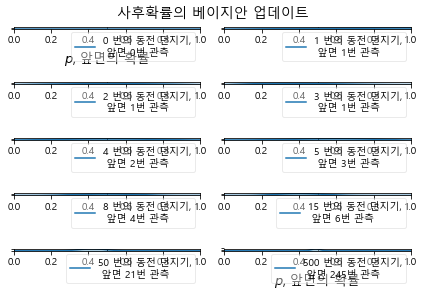

In [2]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    if k in [0, len(n_trials) - 1]:
        plt.xlabel('$p$, 앞면의 확률', fontsize = 13)
    else:
        None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label='{} 번의 동전 던지기,\n 앞면 {}번 관측'.format(N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)

plt.tight_layout()